In [234]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math

def get_image(path: str):
    #convert("L") - konwersja zdjęcia do skali szarości
    return np.array(Image.open(path).convert("L") )

def show_image(imageArray: np.ndarray):
    img = Image.fromarray(imageArray)
    plt.figure(figsize=(8, 4))
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)  
    plt.show()    

# Zadanie nr 1
Napisz skrypt w Pythonie/Matlabie umożliwiający wczytywanie i wizualizację badanych obrazów. Program powinien umożliwiać:
1. wyświetlanie obrazu wczytanego z pliku o podanej nazwie,
2. sporządzenie wykresów zmian poziomu szarości wzdłuż wybranej linii poziomej
lub pionowej o zadanej współrzędnej,
3. wybór podobrazu (prostokątnego obszaru) o podanych współrzędnych oraz jego
zapis do pliku o zadanej nazwie.

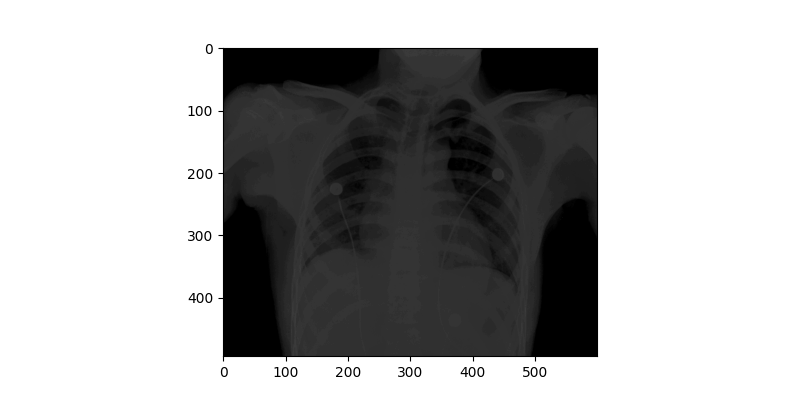

In [235]:
img_chest_xray = get_image('resources/chest-xray.tif')
show_image(img_chest_xray)

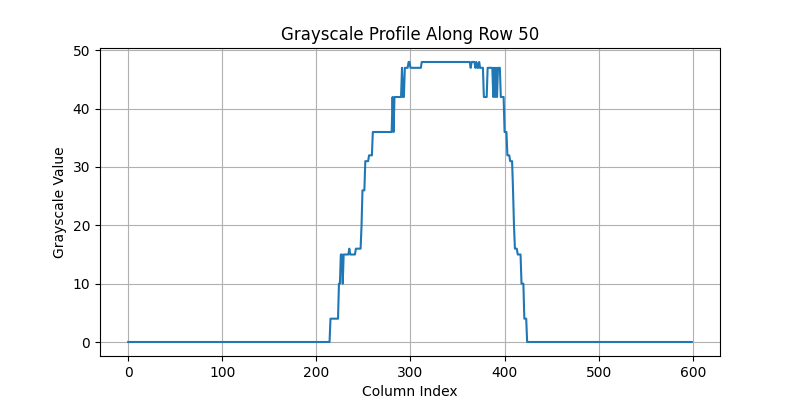

In [236]:
def plot_line_profile(image: np.ndarray, index: int, orientation: str):
    plt.figure(figsize=(8, 4))

    if orientation == 'horizontal':
        line_data = image[index, :]  # Extract the row
        plt.title(f'Grayscale Profile Along Row {index}')
        plt.xlabel('Column Index')
    elif orientation == 'vertical':
        line_data = image[:, index]  # Extract the column
        plt.title(f'Grayscale Profile Along Column {index}')
        plt.xlabel('Row Index')
    else:
        raise ValueError("Orientation must be 'horizontal' or 'vertical'")

    plt.plot(line_data)
    plt.ylabel('Grayscale Value')
    plt.grid(True)
    plt.show()


global img_chest_xray
plot_line_profile(img_chest_xray, 50, 'horizontal')

# Zadanie nr 2
```
Przekształcenie punktowe T obrazu ma ogólną postać s = T(r), gdzie r, s oznaczają odpowiednio poziom szarości piksela obrazu wejściowego i wyjściowego.
```

Zaobserwuj działanie następujących przekształceń punktowych na
przykładowych obrazach:
<br/>
a) Mnożenie obrazu przez stałą T(r) = c · r, gdzie c jest stałą.
Obrazy: chest_xray.tif, pollen-dark.tif, spectrum.tif.
<br/>
b) Transformację logarytmiczną
T(r) = c · log (1 + r).
Obraz: spectrum.tif.
<br/>
c) Zmianę dynamiki skali szarości (kontrastu). Możesz zastosować transformację o
postaci
T(r) = 1/(1 + (m/r)^e),
<br/>
gdzie m i e są ustalonymi parametrami przekształcenia (np. m = 0,45, e = 8).
Wykreśl T(r), by lepiej uwidocznić wpływ T na kontrast obrazu wyjściowego.
Przeprowadź eksperymenty z różnymi wartościami parametrów m i e.
<br/>
d) Korekcję gamma, zdefiniowaną jako s = c · r^γ
, gdzie c > 0 i γ > 0 są stałymi
we wzorze przekształcenia.
Obraz: aerial_view.tif.

In [237]:
def image_transform_iterative(image: np.ndarray, transform: callable):
    copy = image.copy()
    for i in range(copy.shape[0]):
        for j in range(copy.shape[1]):
            copy[i, j] = transform(copy[i, j])
    return copy


def image_transform(image: np.ndarray, transform: callable):
    vfunc = np.vectorize(transform)
    return vfunc(image.copy())


# UWAGA: funkcja transformująca musi przyjmować i zwracać wartości z zakresu [0, 255], jeśli przekroczy 255 to zostanie obcięta
def image_transform_optimized(image: np.ndarray, transform: callable):
    transformed_img = transform(image.copy())
    return np.clip(transformed_img, 0, 255).astype(image.dtype)

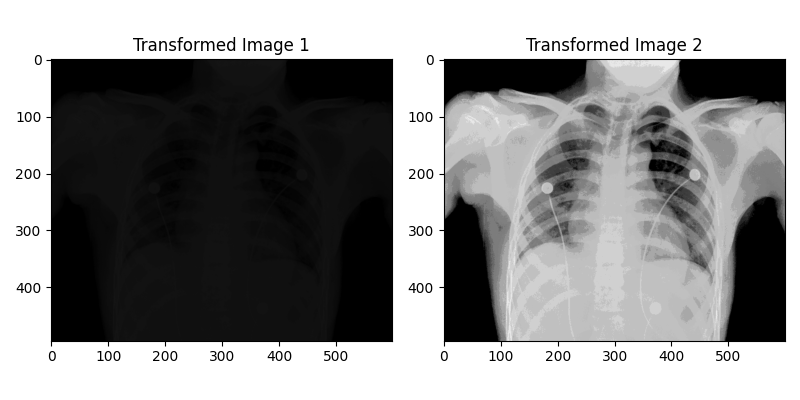

In [238]:
# a) Mnożenie razy stałą
def const_transform1(x): return x*0.35
def const_transform2(x): return x*4


global img_chest_xray
img_chest_xray_transformed1 = image_transform_optimized(
    img_chest_xray, const_transform1)
img_chest_xray_transformed2 = image_transform_optimized(
    img_chest_xray, const_transform2)


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(Image.fromarray(img_chest_xray_transformed1),
           cmap='gray', vmin=0, vmax=255)
ax1.set_title('Transformed Image 1')
ax2.imshow(Image.fromarray(img_chest_xray_transformed2),
           cmap='gray', vmin=0, vmax=255)
ax2.set_title('Transformed Image 2')
plt.tight_layout()
plt.show()